# 💰💵 **World’s Billionaires Data Analysis** 💵💰

### 🌍 Introduction
This analysis explores various aspects of the global billionaire population using a dataset of billionaires, including their demographic details, wealth, and geographical distribution. The focus is on understanding how factors such as gender, age, region, and wealth type correlate with the concentration of billionaires worldwide. Additional insights include trends in self-made versus inherited wealth, birth month distributions, and the relationship between economic indicators and the number of billionaires in a country.


---

<a id="cont"></a>

### **Table of Contents**

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA) - Non-Graphical</a>

<a href=#four>4. Data Preprocessing</a>

<a href=#five>5. Exploratory Data Analysis (EDA) - Graphical</a>

<a href=#six>6. Summary</a>


 <a id="one"></a>
## **1. 📦Importing Packages**
<a href=#cont>Back to Table of Contents</a>

In [70]:
# Import essential libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For plotting graphs

# Importing Pearson correlation from scipy for correlation analysis
from scipy.stats import pearsonr  

# Import Plotly libraries for interactive visualizations
import plotly.express as px  # For simple visualizations
import plotly.graph_objects as go  # For more complex visualizations
from plotly.subplots import make_subplots  # For creating subplots

# This option allows displaying all columns when showing dataframes
pd.options.display.max_columns = None  

# Suppress warnings that can clutter the output
import warnings
warnings.filterwarnings("ignore")



<a id="two"></a>
## **2. 📋Loading the Data**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [71]:
# Load dataset
billionaire_df = pd.read_csv('Billionaires Statistics Dataset.csv')

# Displaying the first few rows of the dataset
billionaire_df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,False,U,M,3/5/1949 0:00,Arnault,Bernard,Chairman and CEO,4/4/2023 5:01,NaN,NaN,1949.0,3.0,5.0,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,True,D,M,6/28/1971 0:00,Musk,Elon,CEO,4/4/2023 5:01,Texas,South,1971.0,6.0,28.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,True,D,M,1/12/1964 0:00,Bezos,Jeff,Chairman and Founder,4/4/2023 5:01,Washington,West,1964.0,1.0,12.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,True,U,M,8/17/1944 0:00,Ellison,Larry,CTO and Founder,4/4/2023 5:01,Hawaii,West,1944.0,8.0,17.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),True,D,M,8/30/1930 0:00,Buffett,Warren,CEO,4/4/2023 5:01,Nebraska,Midwest,1930.0,8.0,30.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


<a id="three"></a>
## **3. 🧮Exploratory Data Analysis (EDA) - Non-Graphical**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


- ### **Understanding the Structure of the Dataset**

In [72]:
# Checking the number of columns and rows in the Dataset
rows, columns = billionaire_df.shape
print('1. Number of observations in the dataset is: {}'.format(rows),
      '2. Number of features in the dataset: {}'.format(columns), sep='\n')

1. Number of observations in the dataset is: 2640
2. Number of features in the dataset: 35


In [73]:
# Checking the basic structure of the dataset
billionaire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

#### Findings
**Columns and Non-Null Count**
- `rank`, `finalWorth`, `category`, `personName`, and `industries` columns have **2,640 non-null entries**, indicating the absence of missing values.
- Columns such as `organization`, `state`, and `residenceStateRegion` have many null entries, with only **325, 753, and 747 non-null entries**, respectively.

**Data Types**
- **int64**: 2 columns (`rank`, `finalWorth`) are stored as 64-bit integers.
- **float64**: 14 columns, such as `age`, `birthYear`, and various economic indicators (e.g., `cpi_country`, `gdp_country`), are stored as floating-point numbers to handle decimals and NaN values.
- **object**: 18 columns (e.g., `category`, `country`, `city`, `personName`) are stored as generic objects, often used for strings.
- **bool**: 1 column (`selfMade`) stores boolean (True/False) values.
  


In [74]:
# Show the columns of the billionaire dataset
billionaire_df.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [75]:
# Display descriptive statistics of the billionaire dataset
billionaire_df.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


In [76]:
# Checking for missing values in each column
billionaire_df.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [77]:
# Checking the percentage of missing values in each column
round(billionaire_df.isnull().sum()/len(billionaire_df) * 100, 2).astype(str) + '%'

rank                                            0.0%
finalWorth                                      0.0%
category                                        0.0%
personName                                      0.0%
age                                            2.46%
country                                        1.44%
city                                           2.73%
source                                          0.0%
industries                                      0.0%
countryOfCitizenship                            0.0%
organization                                  87.69%
selfMade                                        0.0%
status                                          0.0%
gender                                          0.0%
birthDate                                      2.88%
lastName                                        0.0%
firstName                                      0.11%
title                                         87.16%
date                                          

<a id="four"></a>
## **4. 🛠️Data Preprocessing**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


- ### **Cleaning Dataset**

In [78]:
# Define function for cleaning
def clean_df(df):
    # Strip all columns, make them lowercase and replace spaces with underscores
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    
    # Strip the $ sign, remove commas, and change the data type of 'gdp_country' column to float
    df['gdp_country'] = df['gdp_country'].replace({'\$': '', ',': ''}, regex=True).astype(float)
    
    
    # Convert 'date' column to datetime and format as 'mm/dd/yyyy'
    df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M').dt.strftime('%m/%d/%Y')
    
    # Remove $ sign in 'finalworth' and convert to float (assuming figures are in billions)
    df['finalworth'] = df['finalworth'].replace({'\$': '', ' B': 'e9'}, regex=True).astype(float)
    
    # Rename the columns
    df.rename(columns={'personname': 'full_name'}, inplace=True)
    df.rename(columns={'finalworth': 'final_worth'}, inplace=True)
    df.rename(columns={'countryofcitizenship': 'country_of_citizenship'}, inplace=True)
    df.rename(columns={'residencestateregion': 'residence_state_region'}, inplace=True)
    df.rename(columns={'birthyear': 'birth_year'}, inplace=True)
    df.rename(columns={'birthmonth': 'birth_month'}, inplace=True)
    df.rename(columns={'firstname': 'first_name'}, inplace=True)
    df.rename(columns={'lastname': 'last_name'}, inplace=True)
    df.rename(columns={'birthdate': 'birth_date'}, inplace=True)
    df.rename(columns={'lastname': 'last_name'}, inplace=True)
    
    # Create the month dictionary
    month_dict = {
        1: 'Jan',
        2: 'Feb',
        3: 'Mar',
        4: 'Apr',
        5: 'May',
        6: 'Jun',
        7: 'Jul',
        8: 'Aug',
        9: 'Sep',
        10: 'Oct',
        11: 'Nov',
        12: 'Dec'
    }

    # Replace month numbers with names using the dictionary
    df['birth_month'] = df['birth_month'].replace(month_dict)
    return df

# Clean the DataFrame with the clean_df function
cleaned_billionaire_df = clean_df(billionaire_df)
cleaned_billionaire_df.head()

,rank,final_worth,category,full_name,age,country,city,source,industries,country_of_citizenship,organization,selfmade,status,gender,birth_date,last_name,first_name,title,date,state,residence_state_region,birth_year,birth_month,birthday,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000.0,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,False,U,M,3/5/1949 0:00,Arnault,Bernard,Chairman and CEO,04/04/2023,NaN,NaN,1949.0,Mar,5.0,110.05,1.1,2.715518e+12,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000.0,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,True,D,M,6/28/1971 0:00,Musk,Elon,CEO,04/04/2023,Texas,South,1971.0,Jun,28.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000.0,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,True,D,M,1/12/1964 0:00,Bezos,Jeff,Chairman and Founder,04/04/2023,Washington,West,1964.0,Jan,12.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000.0,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,True,U,M,8/17/1944 0:00,Ellison,Larry,CTO and Founder,04/04/2023,Hawaii,West,1944.0,Aug,17.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000.0,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),True,D,M,8/30/1930 0:00,Buffett,Warren,CEO,04/04/2023,Nebraska,Midwest,1930.0,Aug,30.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


- ### **Fill Missing Values**

In [79]:
# Define a function to fill missing values with 'Unknown' for specified columns
def fill_missing_values(df):
    columns_to_replace = ['country', 'title', 'organization', 'residence_state_region', 'state']
    for column in columns_to_replace:
        df[column].fillna('Unknown', inplace=True)
    return df

# Apply the function to the dataset
cleaned_billionaire_df = fill_missing_values(cleaned_billionaire_df)
cleaned_billionaire_df.head()

,rank,final_worth,category,full_name,age,country,city,source,industries,country_of_citizenship,organization,selfmade,status,gender,birth_date,last_name,first_name,title,date,state,residence_state_region,birth_year,birth_month,birthday,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000.0,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,False,U,M,3/5/1949 0:00,Arnault,Bernard,Chairman and CEO,04/04/2023,Unknown,Unknown,1949.0,Mar,5.0,110.05,1.1,2.715518e+12,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000.0,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,True,D,M,6/28/1971 0:00,Musk,Elon,CEO,04/04/2023,Texas,South,1971.0,Jun,28.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000.0,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,True,D,M,1/12/1964 0:00,Bezos,Jeff,Chairman and Founder,04/04/2023,Washington,West,1964.0,Jan,12.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000.0,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,True,U,M,8/17/1944 0:00,Ellison,Larry,CTO and Founder,04/04/2023,Hawaii,West,1944.0,Aug,17.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000.0,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),True,D,M,8/30/1930 0:00,Buffett,Warren,CEO,04/04/2023,Nebraska,Midwest,1930.0,Aug,30.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [11]:
# Checking the percentage of missing values in each column
round(cleaned_billionaire_df.isnull().sum()/len(billionaire_df) * 100, 2).astype(str) + '%'

rank                                           0.0%
final_worth                                    0.0%
category                                       0.0%
full_name                                      0.0%
age                                           2.46%
country                                        0.0%
city                                          2.73%
source                                         0.0%
industries                                     0.0%
country_of_citizenship                         0.0%
organization                                   0.0%
selfmade                                       0.0%
status                                         0.0%
gender                                         0.0%
birth_date                                    2.88%
last_name                                      0.0%
first_name                                    0.11%
title                                          0.0%
date                                           0.0%
state       

- ### **Add a New Feature**

In [80]:
# Dictionary mapping countries to regions
country_region_dict = {
    'France': 'Europe',
    'United States': 'North America',
    'Mexico': 'Latin America and the Caribbean',
    'India': 'Asia',
    'Spain': 'Europe',
    'China': 'Asia',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Italy': 'Europe',
    'Hong Kong': 'Asia',
    'Austria': 'Europe',
    'Japan': 'Asia',
    'Switzerland': 'Europe',
    'Australia': 'Oceania',
    'Indonesia': 'Asia',
    'Russia': 'Europe', 
    'Chile': 'Latin America and the Caribbean',
    'United Kingdom': 'Europe',
    'Israel': 'Asia',
    'Brazil': 'Latin America and the Caribbean',
    'Czech Republic': 'Europe',
    'Singapore': 'Asia',
    'Sweden': 'Europe',
    'Thailand': 'Asia',
    'Netherlands': 'Europe',
    'Nigeria': 'Africa',
    'Cyprus': 'Asia',
    'Malaysia': 'Asia',
    'United Arab Emirates': 'Asia',
    'South Africa': 'Africa',
    'New Zealand': 'Oceania',
    'Philippines': 'Asia',
    'Monaco': 'Europe',
    'Belgium': 'Europe',
    'South Korea': 'Asia',
    'Taiwan': 'Asia',
    'Norway': 'Europe',
    'Egypt': 'Africa',
    'Denmark': 'Europe',
    'Ireland': 'Europe',
    'Eswatini (Swaziland)': 'Africa',
    'Colombia': 'Latin America and the Caribbean',
    'Poland': 'Europe',
    'Ukraine': 'Europe',
    'Greece': 'Europe',
    'Turkey': 'Asia',
    'Argentina': 'Latin America and the Caribbean',
    'Georgia': 'Asia',
    'Portugal': 'Europe',
    'Kazakhstan': 'Asia',
    'Algeria': 'Africa',
    'Venezuela': 'Latin America and the Caribbean',
    'Vietnam': 'Asia',
    'Finland': 'Europe',
    'Belize': 'Latin America and the Caribbean',
    'Lebanon': 'Asia',
    'Oman': 'Asia',
    'Iceland': 'Europe',
    'Guernsey': 'Europe',
    'Liechtenstein': 'Europe',
    'Bulgaria': 'Europe',
    'Romania': 'Europe',
    'Zimbabwe': 'Africa',
    'Qatar': 'Asia',
    'Nepal': 'Asia',
    'Slovakia': 'Europe',
    'Morocco': 'Africa',
    'Hungary': 'Europe',
    'Tanzania': 'Africa',
    'Peru': 'Latin America and the Caribbean',
    'Barbados': 'Latin America and the Caribbean',
    'Macau': 'Asia',
    'Estonia': 'Europe',
    'St. Kitts and Nevis': 'Latin America and the Caribbean',
    'Armenia': 'Asia',
    'Bangladesh': 'Asia',
    'Panama': 'Latin America and the Caribbean',
    'Uzbekistan': 'Asia',
    'Bahamas': 'Latin America and the Caribbean',
    'Cayman Islands': 'Latin America and the Caribbean',
    'Latvia': 'Europe',
    'Bermuda': 'North America',
    'Luxembourg': 'Europe',
    'British Virgin Islands': 'Latin America and the Caribbean',
    'Cambodia': 'Asia',
    'Turks and Caicos Islands': 'Latin America and the Caribbean',
    'Uruguay': 'Latin America and the Caribbean',
    'Bahrain': 'Asia',
    'Andorra': 'Europe',
    'Unknown': 'Unknown'
}

# Create a new column 'region' based on 'country_of_citizenship'
cleaned_billionaire_df['region'] = cleaned_billionaire_df['country_of_citizenship'].map(country_region_dict)

# Display the updated DataFrame
cleaned_billionaire_df[['country_of_citizenship', 'region']]

,country_of_citizenship,region
0,France,Europe
1,United States,North America
2,United States,North America
3,United States,North America
4,United States,North America
...,...,...
2635,China,Asia
2636,United States,North America
2637,China,Asia
2638,China,Asia


<a id="five"></a>
## **5. 📊Exploratory Data Analysis (EDA) - Graphical**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### 5.1 Who is the wealthiest person on the planet as at August 2023❓

In [81]:
def final_worth_billion(value):
    # Format the net worth value by appending ' B' and adding a dollar sign
    return f"${value} B"

# Create a new column 'Net worth in B' by dividing 'final_worth' by 1000
# and formatting it using the format_final_worth function
cleaned_billionaire_df['networth_in_billions'] = (cleaned_billionaire_df['final_worth']/1000).apply(final_worth_billion)

# Create a table using Plotly to display selected columns from the DataFrame
table = go.Figure(data=[go.Table(
    header=dict(
        values=['Rank', 'Name of Billionaire', 'Net worth', 'Age', 'Country', 'Source', 'Industries'],
        fill_color='#481467',  # Header background color
        font=dict(color='white', size=14),  # Header text color changed to blue and increased font size
    ),
    cells=dict(
        values=[
            cleaned_billionaire_df['rank'],               
            cleaned_billionaire_df['full_name'],          
            cleaned_billionaire_df['networth_in_billions'],     
            cleaned_billionaire_df['age'],                 
            cleaned_billionaire_df['country_of_citizenship'],  
            cleaned_billionaire_df['source'],              
            cleaned_billionaire_df['industries']          
        ],
        
        # Set the background color for each cell
        fill_color=[
            ['#dba9f9'] * len(cleaned_billionaire_df),  
            ['#7dfde1'] * len(cleaned_billionaire_df),  
            ['#dba9f9'] * len(cleaned_billionaire_df),   
            ['#7dfde1'] * len(cleaned_billionaire_df),    
            ['#dba9f9'] * len(cleaned_billionaire_df),     
            ['#7dfde1'] * len(cleaned_billionaire_df),    
            ['#dba9f9'] * len(cleaned_billionaire_df)      
        ],
        font=dict(color='black', size=12)  # Cell text color
    )
)])

# Drop the 'Net worth in B' column from the DataFrame since it is no longer needed
cleaned_billionaire_df = cleaned_billionaire_df.drop(columns=['networth_in_billions'])

# Update the layout of the table with specified width, height, and a title
table.update_layout(
    width=1200,
    height=500,
    title={
        'text': "Billionaires Information Table",
        'y': 0.95,  # Vertical position of the title
        'x': 0.5,   # Horizontal position of the title (center)
        'xanchor': 'center',
        'yanchor': 'middle',
    
    }
)

# Display the table
table.show()


####  🔍Findings
- `Bernard Arnaukt` a `74` year old man from France who happens to be the CEO of `LVMH` is the wealthiest person on earth.
- He is worth a staggering `'$211 B`
- `LVMH Moët Hennessy Louis Vuitton`, commonly referred to as `LVMH`, is a French multinational corporation and conglomerate headquartered in Paris. It is known for being one of the world's largest luxury goods companies, encompassing a wide range of sectors, including:

- **Luxury Brands**: LVMH owns numerous prestigious brands across various categories:
   - `Fashion and Leather Goods`: Louis Vuitton, Dior, Fendi, Celine, Givenchy, and Loewe.
   - `Wines and Spirits`: Moët & Chandon, Hennessy, Dom Pérignon, Veuve Clicquot, and Glenmorangie.
   - `Perfumes and Cosmetics`: Christian Dior Parfums, Givenchy Beauty, and Benefit Cosmetics.
   - `Watch and Jewelry`: TAG Heuer, Bulgari, and Hublot.

- **Financial Performance**: The company has demonstrated strong financial performance, with substantial revenues generated from its diverse portfolio of luxury brands. It often reports double-digit growth rates, particularly in emerging markets.

- **Sustainability**: LVMH has made commitments to sustainability and responsible business practices, focusing on environmental impact and social responsibility.

- **Cultural Influence**: The company is heavily involved in arts and culture, sponsoring events and exhibitions, and supporting creativity through initiatives like the LVMH Prize for Young Fashion Designers.

### 5.2 What is the distribution of billionaires by country❓

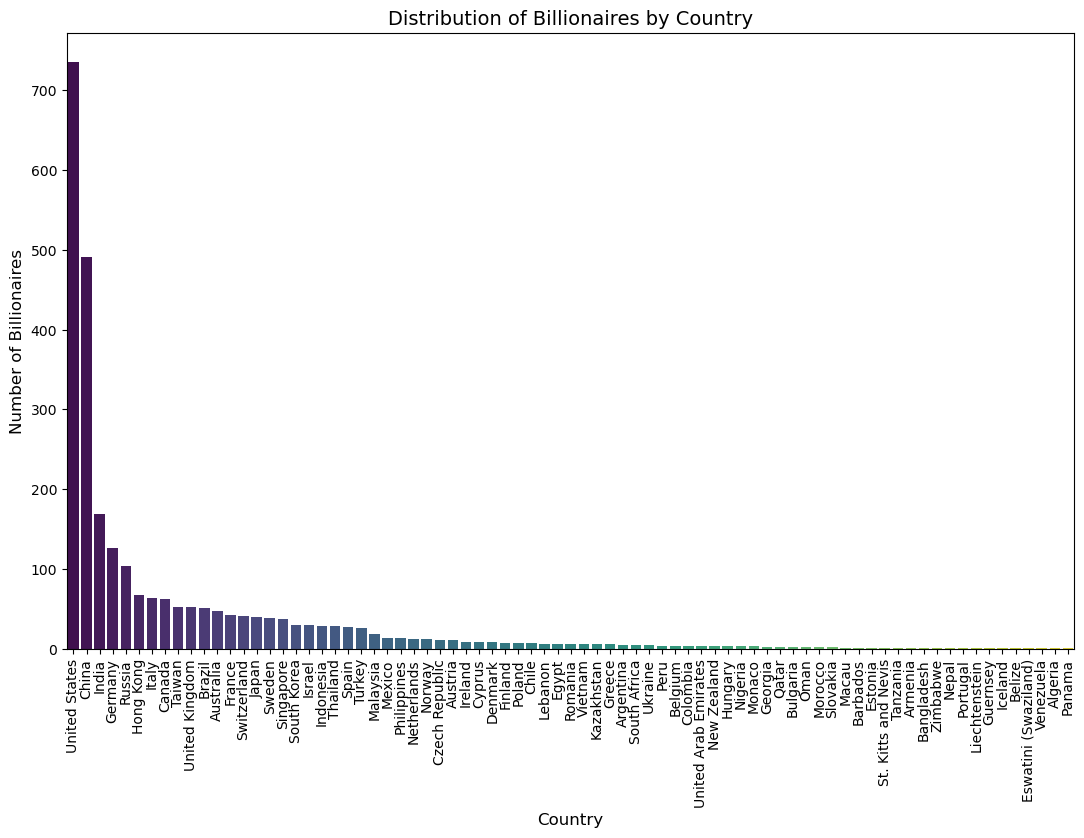

In [82]:
# Count the number of billionaires by country
billionaires_by_country = cleaned_billionaire_df['country_of_citizenship'].value_counts()

# Plot a bar chart for billionaires by country
plt.figure(figsize=(13, 8))
sns.barplot(x=billionaires_by_country.index, y=billionaires_by_country.values, palette='viridis')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Distribution of Billionaires by Country', fontsize=14)
plt.ylabel('Number of Billionaires', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()


####  🔍Findings
- The `United States` leads significantly in the number of billionaires, indicating a strong concentration of wealth and entrepreneurial success.
- Other countries with notable billionaire counts include `China`, `India`, and `Germany`, reflecting diverse economic landscapes and opportunities for wealth generation.
- Several countries have relatively few billionaires, suggesting economic challenges or less favorable environments for wealth accumulation.

These findings highlight the global disparities in wealth concentration among billionaires and the economic conditions influencing these distributions.


### 5.3 What is the distribution of billionaires by region❓

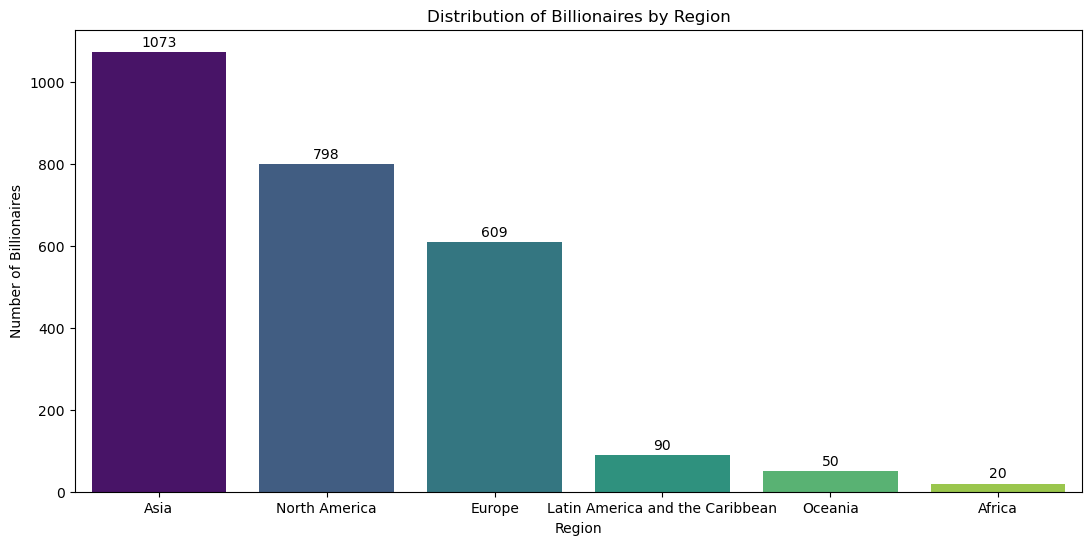

In [83]:
# Count the number of billionaires by region
billionaires_by_region = cleaned_billionaire_df['region'].value_counts()

# Plot a bar chart for billionaires by region
plt.figure(figsize=(13, 6))
bar_plot = sns.barplot(
    x=billionaires_by_region.index, 
    y=billionaires_by_region.values, 
    palette="viridis"
)

# Set the first bar color to #481467 and the rest to Viridis
bars = bar_plot.patches
bars[0].set_facecolor('#481467')  # Set the first bar color

# Customize labels and title
plt.title('Distribution of Billionaires by Region')
plt.xlabel('Region')
plt.ylabel('Number of Billionaires')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add count annotations on each bar
for p in bars:
    bar_plot.annotate(
        int(p.get_height()),  # Get the height of each bar
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the count at the top of the bar
        ha='center',  # Center the text horizontally
        va='bottom',  # Position the text above the bar
        fontsize=10,  # Font size for the count
        color='black',  # Color of the text
        xytext=(0, 2),  # Offset the text a little higher
        textcoords='offset points'
    )

plt.show()


####  🔍Findings
- `Asia` has the highest concentration of billionaires, driven primarily by `China and India`, reflecting its robust economy and entrepreneurial environment.
- `North America` follows closely, driven primarily by `USA`, showcasing rapid economic growth and wealth creation in the region.
- `Europe`, while home to many billionaires, shows a lower count compared to the leading regions, indicating varying levels of wealth accumulation and economic conditions.
- Other regions, such as `Latin America and the Caribbean`, `Oceania` and `Africa`, have significantly fewer billionaires, highlighting economic challenges and opportunities for growth.

These findings emphasize the geographical disparities in billionaire wealth and the economic factors contributing to these distributions.


### 5.4 What is the gender distribution among billionaires globally❓

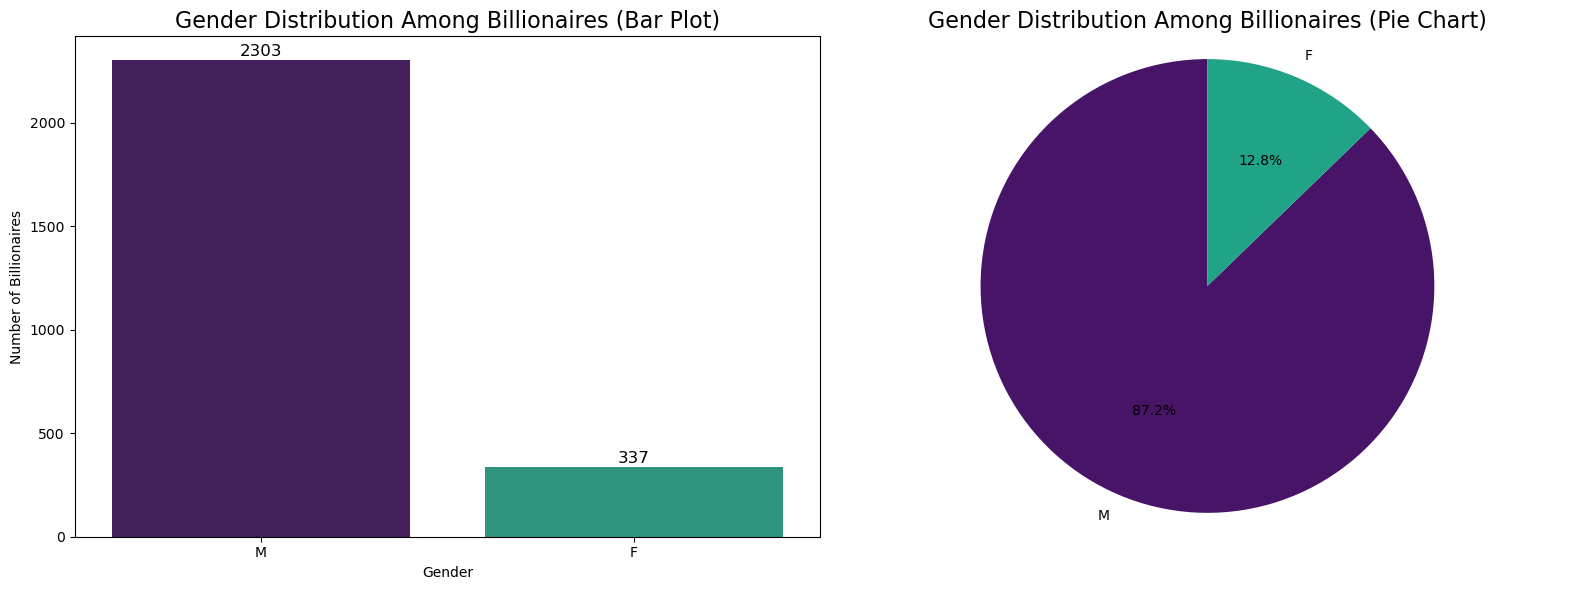

In [84]:
# Count the number of billionaires by gender
gender_distribution = cleaned_billionaire_df['gender'].value_counts()

# Create subplots for bar and pie charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = ['#481467', '#20a386']  # Define colors specifically for 'F' and 'M'

# Bar Plot
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, ax=axes[0], palette=colors)
axes[0].set_title('Gender Distribution Among Billionaires (Bar Plot)', fontsize=16)
axes[0].set_ylabel('Number of Billionaires')
axes[0].set_xlabel('Gender')

# Add count labels to each bar
for p in axes[0].patches:
    axes[0].annotate(
        int(p.get_height()),  # Get the height of each bar
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the count at the top of the bar
        ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 1), textcoords='offset points'
    )

# Pie Chart
axes[1].pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', 
            startangle=90, colors=colors)
axes[1].set_title('Gender Distribution Among Billionaires (Pie Chart)', fontsize=16)
axes[1].axis('equal')  # Ensure pie chart is circular

# Adjust layout and display
plt.tight_layout()
plt.show()


####  🔍Findings
- The `bar chart` clearly shows that there are significantly more male billionaires `(2303)` compared to female billionaires `(337)`, reflecting the ongoing gender disparities in wealth accumulation and business leadership.
- The `pie chart` reinforces this observation, illustrating the percentage share of each gender. The majority `(87.2%)` of billionaires are male, while females represent a smaller proportion `(12.8%)` of the billionaire population.
- These findings highlight the need for continued efforts to promote gender equality and empower women in business and entrepreneurship to bridge the wealth gap.


### 5.5 How do the numbers of male and female billionaires vary across different industries❓

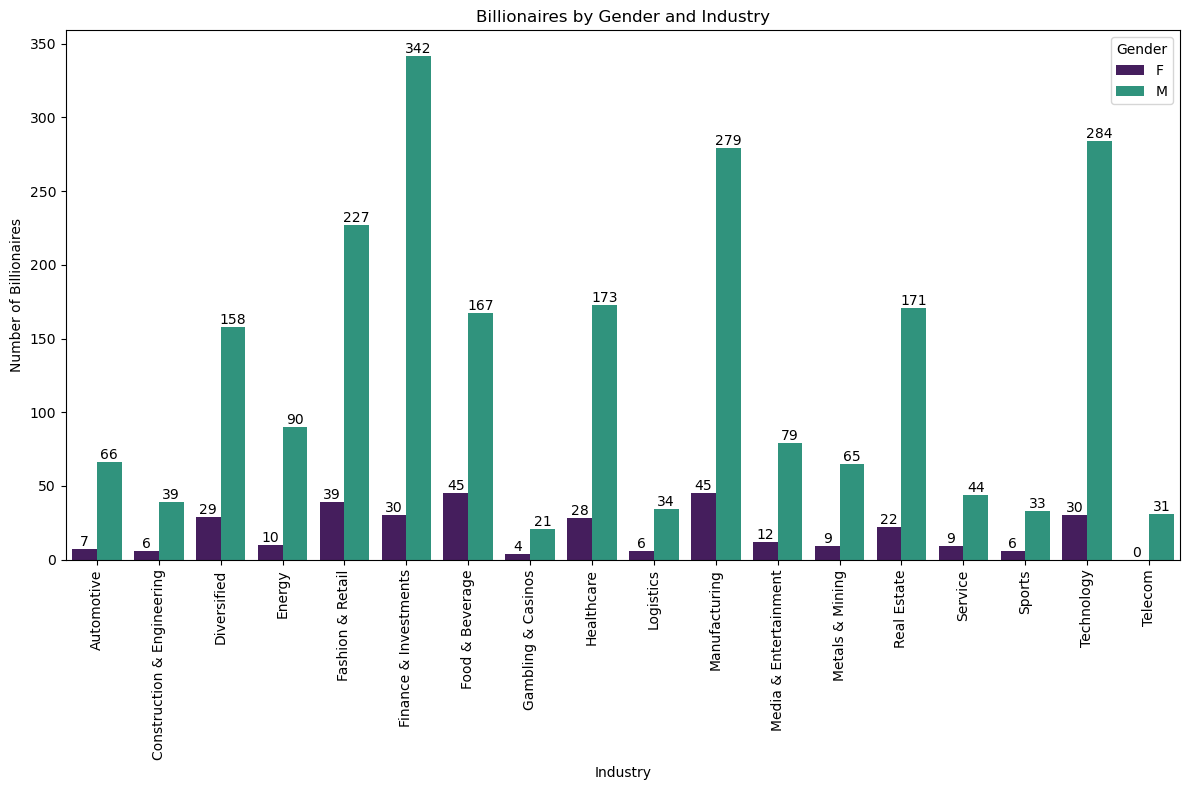

In [85]:
# Create a pivot table for plotting
gender_industry_counts = cleaned_billionaire_df.pivot_table(
    index='industries', 
    columns='gender', 
    values='full_name', 
    aggfunc='count', 
    fill_value=0
).reset_index().melt(id_vars='industries', var_name='Gender', value_name='Count')

# Define custom colors
custom_palette = {'F': '#481467', 'M': '#20a386'}

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=gender_industry_counts, x='industries', y='Count', hue='Gender', palette=custom_palette)

# Customize plot
plt.title('Billionaires by Gender and Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Billionaires')
plt.xticks(rotation=90)
plt.legend(title='Gender', loc='upper right')

# Add count labels
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


####  🔍Findings
- **Gender Disparity**: The data reveals a significant gender disparity, with male billionaires outnumbering female billionaires in all industries. A key observation is that there is `no` female billionaire in the Telecom industry. This highlights the ongoing challenges women face in achieving equal representation and success in wealth accumulation.
- **Call to Action**: The visualization underscores the importance of fostering diversity and inclusion within industries, emphasizing the need for policies and initiatives aimed at empowering women in business and leadership roles.


### 5.6 How does age correlate with net worth among billionaires❓

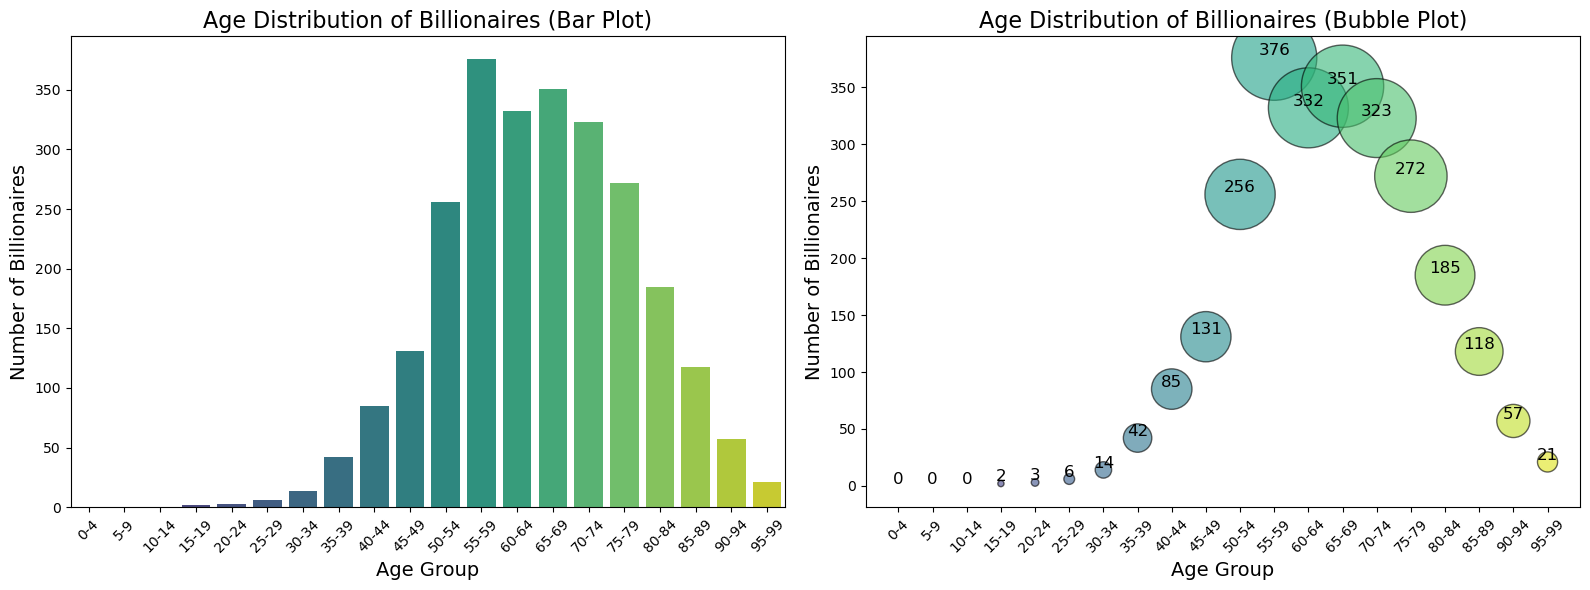

In [86]:
# Create age bins for categorization
age_bins = range(0, 101, 5)  # Binning ages into 5-year intervals
age_labels = [f"{age}-{age + 4}" for age in age_bins[:-1]]  # Create labels for bins

# Create a new column for age groups
cleaned_billionaire_df['age_group'] = pd.cut(cleaned_billionaire_df['age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of billionaires in each age group
age_distribution = cleaned_billionaire_df['age_group'].value_counts().sort_index().reset_index()
age_distribution.columns = ['Age Group', 'Count']

# Create a Viridis color palette for the age groups
viridis_colors = sns.color_palette("viridis", n_colors=len(age_distribution))

# Set up the figure and axes for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar Plot
sns.barplot(x='Age Group', y='Count', data=age_distribution, ax=ax1, palette=viridis_colors)
ax1.set_title('Age Distribution of Billionaires (Bar Plot)', fontsize=16)
ax1.set_xlabel('Age Group', fontsize=14)
ax1.set_ylabel('Number of Billionaires', fontsize=14)
ax1.tick_params(axis='x', rotation=45)

# Bubble Plot
ax2.scatter(
    age_distribution['Age Group'], 
    age_distribution['Count'], 
    s=age_distribution['Count'] * 10,  # Bubble size
    alpha=0.6, 
    edgecolors='black',
    c=viridis_colors  # Use the Viridis color palette for bubbles
)

# Add count labels to each bubble
for i in range(len(age_distribution)):
    ax2.text(
        age_distribution['Age Group'][i], 
        age_distribution['Count'][i] + 2,  # Adjust vertical position for better visibility
        str(age_distribution['Count'][i]), 
        ha='center', 
        fontsize=12
    )

ax2.set_title('Age Distribution of Billionaires (Bubble Plot)', fontsize=16)
ax2.set_xlabel('Age Group', fontsize=14)
ax2.set_ylabel('Number of Billionaires', fontsize=14)
ax2.tick_params(axis='x', rotation=45)

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


####  🔍Findings
- **Peak Billionaire Age Groups**: The highest number of billionaires falls within the `55-59` age group `(376 billionaires)`, followed by the `60-64` group `(351 billionaires)`. This indicates that most billionaires are in their late middle age.

- **Gradual Decline in Older Age Groups**: After the age of `65`, the number of billionaires starts to decline gradually, but the `65-79` age groups still show relatively high numbers, suggesting many billionaires remain wealthy and active during older age.

- **Low Representation Among Younger Individuals**: There are very few billionaires below the age of `40`, with the `15-19`,  `20-24` and `25-29` age groups having just `2`, `3` and `6` billionaires respectively.

- **Longevity of Wealth**: Even in the older age groups, such as `90-94` and `95-99`, a small number of billionaires still exist, showing that wealth can persist into advanced age.

Overall, billionaires are more likely to be found in the `45-79` age range, reflecting that substantial wealth accumulation takes time and typically peaks in late middle age.


### 5.7 What industries or sectors have the highest concentration of billionaires❓

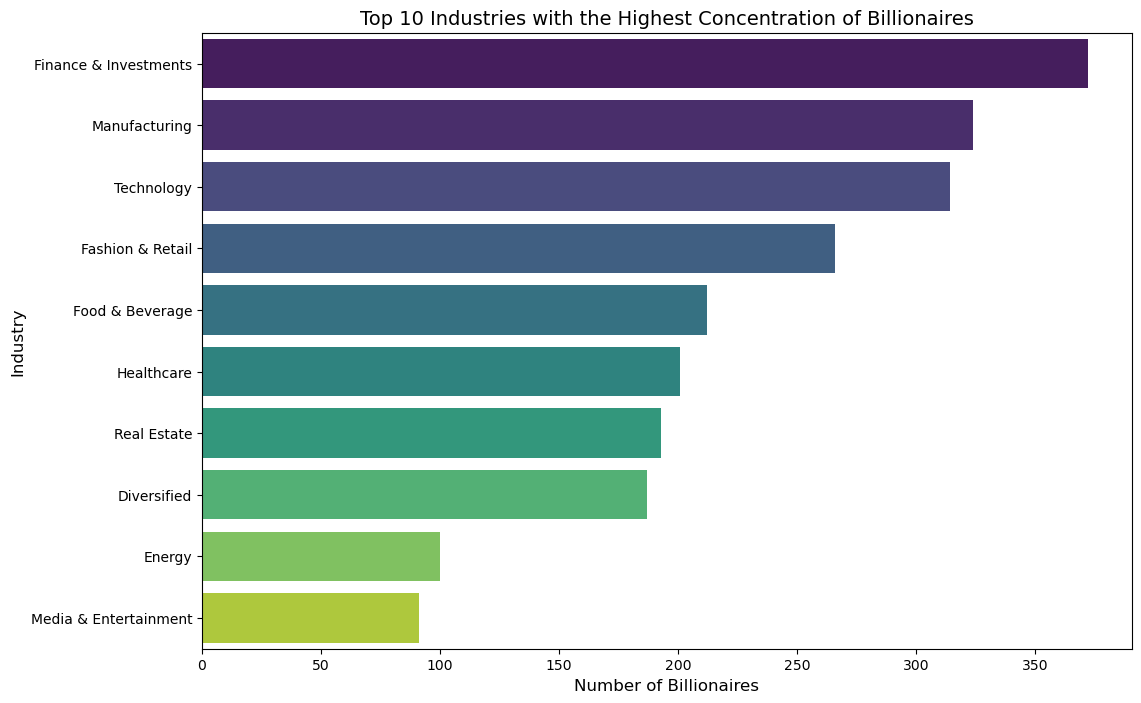

In [87]:
# Count the number of billionaires in each industry
industry_distribution = cleaned_billionaire_df['industries'].value_counts().reset_index()
industry_distribution.columns = ['Industry', 'Count']

# Set up the figure
plt.figure(figsize=(12, 8))

# Get the Viridis color palette
viridis_colors = sns.color_palette("viridis", n_colors=9)  # 9 remaining bars after the first one

# Combine the first color (#481467) with the rest of the Viridis palette
colors = ['#481467'] + viridis_colors

# Create a bar plot for industries
sns.barplot(x='Count', y='Industry', data=industry_distribution.head(10), palette=colors)

# Set the title and labels
plt.title('Top 10 Industries with the Highest Concentration of Billionaires', fontsize=14)
plt.xlabel('Number of Billionaires', fontsize=12)
plt.ylabel('Industry', fontsize=12)

# Show the plot
plt.show()


####  🔍Findings
- **Leading Industries**: The  `finance & investments` sector emerges as the industry with the highest concentration of billionaires, followed by `manufacturing` and `Technology`. This reflects the significant wealth creation potential within these sectors.
- **Diversity of Wealth Sources**: Industries such as `retail & fashion`, `food & beverages` and `healthcare` also feature prominently, indicating diverse avenues for wealth accumulation beyond technology and finance.
- **Economic Insights**: The data suggests that certain industries are more conducive to billionaire wealth, highlighting potential areas for investment and economic growth.
- **Implications for Policy**: Understanding the industries that generate significant wealth can inform policymakers and economic planners in fostering environments that support entrepreneurial growth and innovation.


### 5.8 What percentage of billionaires are self-made versus inherited wealth❓

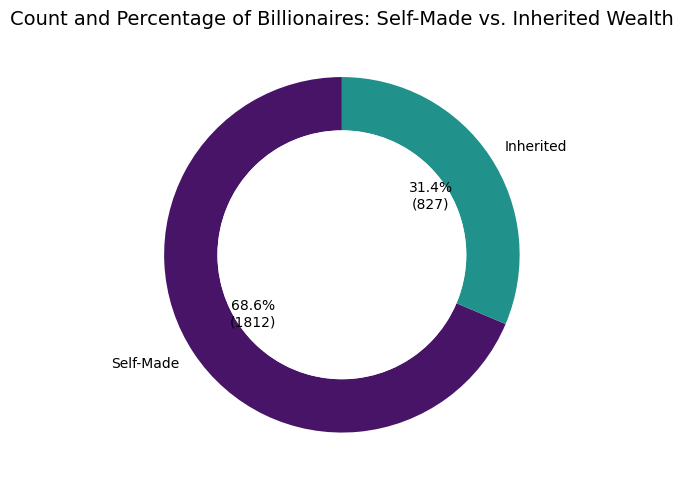

In [88]:
# Replace boolean values with corresponding strings
cleaned_billionaire_df['selfmade'] = cleaned_billionaire_df['selfmade'].replace({True: 'Self-Made', False: 'Inherited'})

# Count the number of billionaires by self-made status
wealth_distribution = cleaned_billionaire_df['selfmade'].value_counts()

# Manually set the color for "Self-Made" and use the Viridis palette for "Inherited"
colors = ['#481467'] + sns.color_palette("viridis", n_colors=len(wealth_distribution) - 1)

# Create a doughnut chart
plt.figure(figsize=(5, 5))
plt.pie(
    wealth_distribution,
    labels=wealth_distribution.index,
    startangle=90,
    colors=colors,
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(wealth_distribution) / 100)})',  # Custom format for percentage and count
    wedgeprops=dict(width=0.3)  # Make it a doughnut by adjusting the wedge width
)

# Add a circle at the center to create a doughnut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')  # Change the radius for thickness
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Count and Percentage of Billionaires: Self-Made vs. Inherited Wealth', fontsize=14)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


####  🔍Findings

- **Self-Made Billionaires**: 
  - Count: `1,812`
  - Percentage: `68.6%`
  - Observation: A significant majority of billionaires are classified as self-made, indicating a strong trend of wealth creation through entrepreneurship and innovation.

- **Inherited Billionaires**: 
  - Count: `827`
  - Percentage: `31.4%`
  - Observation: Inherited wealth accounts for a smaller portion of the billionaire population, suggesting that while family wealth still plays a role, the environment is increasingly favorable for self-made individuals.

The data highlights the predominance of self-made billionaires in the current economic landscape, reflecting a culture that supports entrepreneurship and personal achievement.


### 5.9 Which industries have the highest concentration of billionaires, and how does their average net worth vary across these industries❓

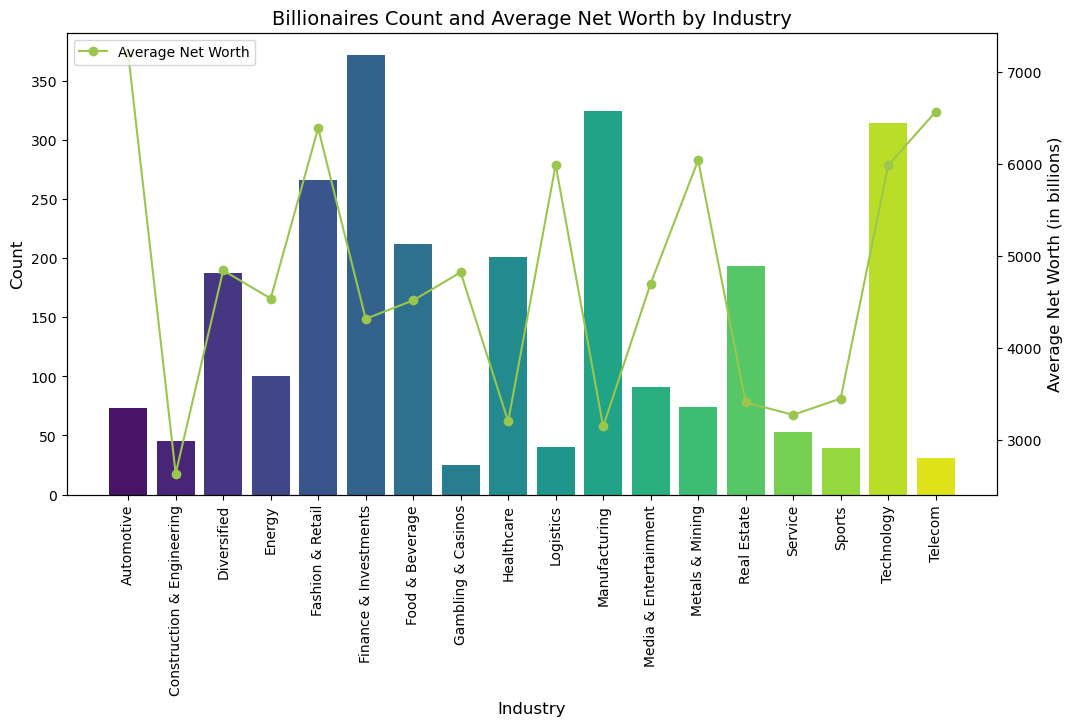

In [89]:
# Group by industries and calculate counts and average net worth
industry_analysis = cleaned_billionaire_df.groupby('industries').agg(
    count=('full_name', 'count'),
    average_net_worth=('final_worth', 'mean')
).reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Set the color from the Viridis palette for the bars
viridis_colors = sns.color_palette("viridis", n_colors=len(industry_analysis))  # Get Viridis palette for bars

# Create a bar plot for the number of billionaires by industry with Viridis colors
plt.bar(industry_analysis['industries'], industry_analysis['count'], color=viridis_colors, label='Number of Billionaires')
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)

# Create a secondary y-axis for average net worth
plt.twinx()

# Plot the average net worth with line color #9ac64d
plt.plot(industry_analysis['industries'], industry_analysis['average_net_worth'], color='#9ac64d', marker='o', label='Average Net Worth')
plt.ylabel('Average Net Worth (in billions)', fontsize=12)

plt.title('Billionaires Count and Average Net Worth by Industry', fontsize=14)
plt.legend(loc='upper left')
plt.show()


####  🔍Findings
- **Industry Distribution**: Certain industries, like `technology` and `finance`, have the highest number of billionaires, indicating lucrative opportunities in these sectors.

- **Wealth Concentration**: The average net worth of billionaires varies by industry, with `technology` often showing higher average wealth compared to others.

- **Investment Insights**: The analysis highlights potential investment opportunities in sectors with high counts and average net worth, guiding strategic economic decisions.


### 5.10 How many billionaires are there in total and what is their total wealth❓

In [90]:
# Count the total number of billionaires
total_billionaires = cleaned_billionaire_df['full_name'].count()

# Calculate total wealth by summing the 'final_worth' column
total_wealth = cleaned_billionaire_df['final_worth'].sum()

# Print the results
print(f'Total number of billionaires: {total_billionaires}')
print(f'Total wealth of billionaires (in trillions): ${total_wealth:,.2f}')


Total number of billionaires: 2640
Total wealth of billionaires (in trillions): $12,206,800.00


####  🔍Findings
- **Total Number of Billionaires**: 
   - The total number of billionaires in the dataset is `2,640`.

- **Total Wealth of Billionaires**: 
   - The combined total wealth of these billionaires is approximately `$12.21 trillion`.


### 5.11 Which city is the most preferred residence for billionaires❓

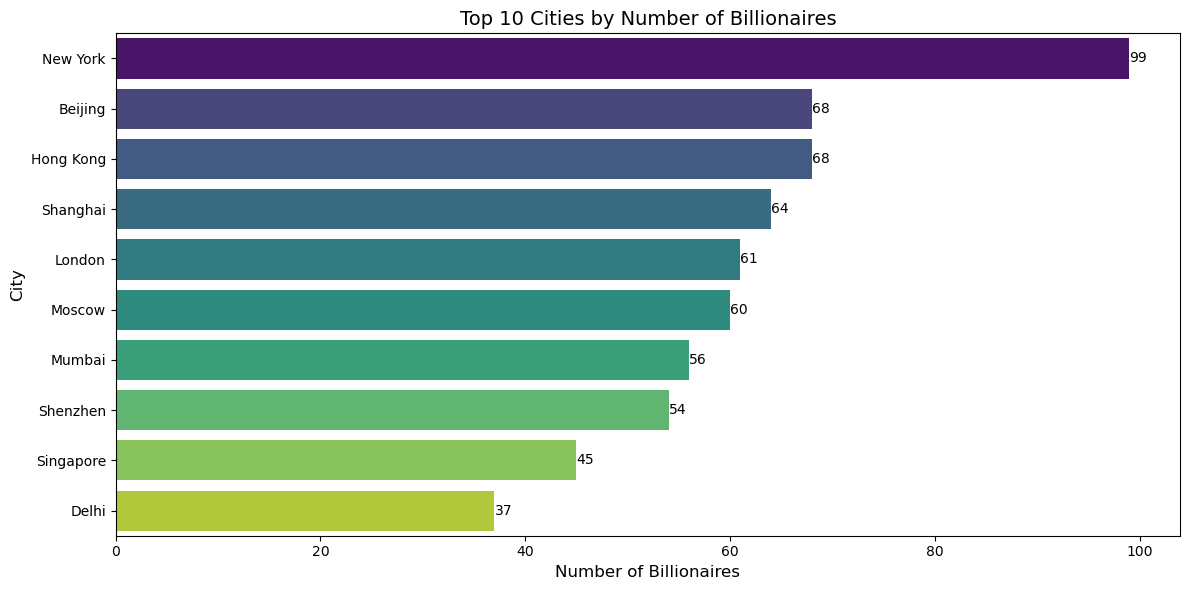

In [91]:
# Count the number of billionaires in each city
city_distribution = cleaned_billionaire_df['city'].value_counts().reset_index()
city_distribution.columns = ['City', 'Number of Billionaires']

# Get the top 10 cities
top_cities = city_distribution.head(10)

# Plotting
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Number of Billionaires', y='City', data=top_cities, palette='viridis')

# Set the first bar color to #481467 and the rest to Viridis
bars = bar_plot.patches
bars[0].set_facecolor('#481467')  # Set the first bar color

# Add title and labels
plt.title('Top 10 Cities by Number of Billionaires', fontsize=14)
plt.xlabel('Number of Billionaires', fontsize=12)
plt.ylabel('City', fontsize=12)

# Show the count on each bar
for index, value in enumerate(top_cities['Number of Billionaires']):
    plt.text(value, index, f"{value}", va='center')

# Show the plot
plt.tight_layout()
plt.show()


####  🔍Findings
- **Leading Cities**: `New York`, `Beijing`, `Hong Kong`, `Shanghai`, `London` and `Moscow` dominate the list, indicating their status as global financial and economic hubs.
- **Geographical Concentration**: The data highlights the concentration of billionaires in metropolitan areas, emphasizing the correlation between urban environments and wealth accumulation.
- **Economic Dynamics**: The presence of numerous billionaires in these cities suggests vibrant economies, robust business infrastructures, and opportunities for innovation and investment.
- **Implications for Urban Planning**: Understanding the wealth distribution across cities can help policymakers focus on fostering environments that attract and retain wealthy individuals and entrepreneurs.


### 5.12 In what month are most billionaires born❓

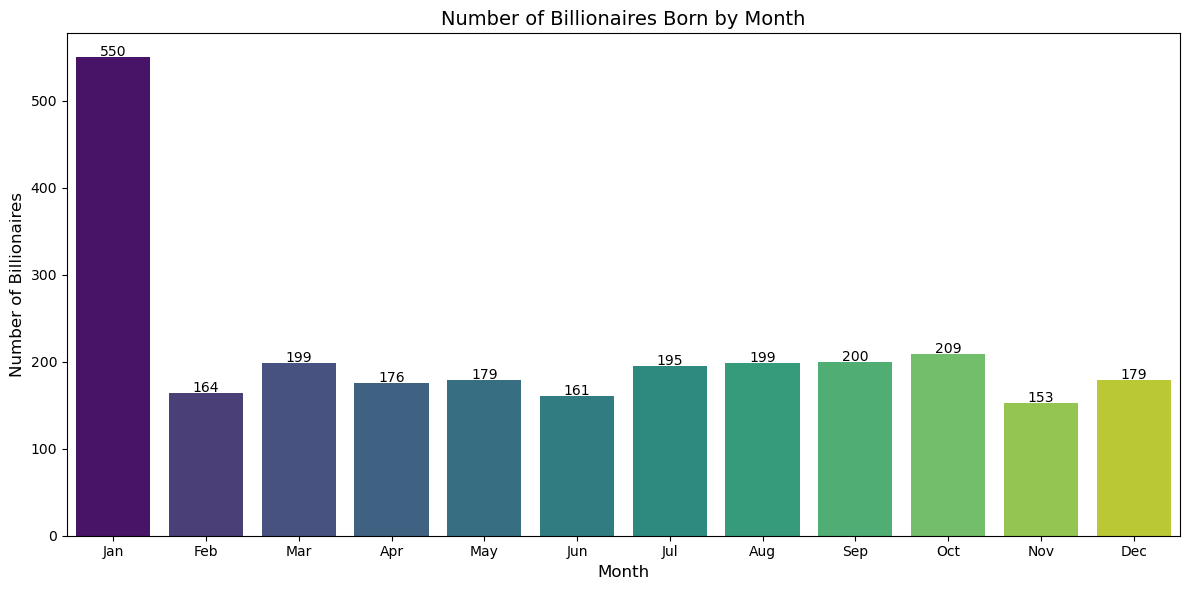

In [92]:
# Define the correct order of months (January to December)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Count the number of billionaires born in each month, replacing the numbers with month names
birth_month_distribution = cleaned_billionaire_df['birth_month'].value_counts()

# Ensure that the data follows the correct order
birth_month_distribution = birth_month_distribution.reindex(month_order)

# Create a bar plot for the distribution of billionaire births by month
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=birth_month_distribution.index, y=birth_month_distribution.values, palette='viridis')

# Set the first bar color to #481467 and the rest to Viridis
bars = bar_plot.patches
bars[0].set_facecolor('#481467')  # Set the first bar color

# Add title and labels
plt.title('Number of Billionaires Born by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Billionaires', fontsize=12)

# Show the count on each bar
for index, value in enumerate(birth_month_distribution.values):
    plt.text(index, value + 1, str(value), ha='center')

# Show the plot
plt.tight_layout()
plt.show()


####  🔍Findings
- **Peak Birth Months**: `January` has the highest number `(550)` of billionaires and is more than twice the nearest month. Certain months, such as `October`, `September`, `March` and `July` show a higher concentration of billionaire births. Does this suggests any potential seasonal or astrological influences on wealth accumulation?
- **Lower Birth Months**: `November`, had the least number `(153)` of billionaires followed closely by `Febraury` and `June `. 
- Generally, aside `January` wealth seems to be fairly distributed
- **Implications for Wealth Trends**: Understanding the birth month distribution of billionaires can provide insights into the socio-economic conditions and opportunities that may influence successful outcomes in these months.


### 5.13 In what day of the week are most billionaires born❓

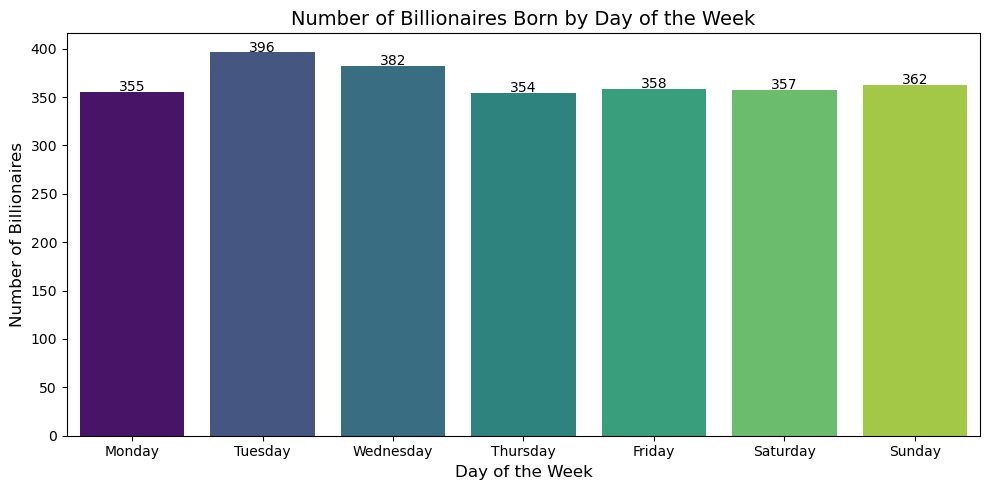

In [93]:
# Convert the birth_date column to datetime format
cleaned_billionaire_df['birth_date'] = pd.to_datetime(cleaned_billionaire_df['birth_date'])

# Extract the day of the week (Monday to Sunday)
cleaned_billionaire_df['day_of_week'] = cleaned_billionaire_df['birth_date'].dt.day_name()

# Count the number of billionaires born on each day of the week
day_distribution = cleaned_billionaire_df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create a bar plot for the distribution of billionaire births by day of the week
plt.figure(figsize=(10, 5))
bar_plot = sns.barplot(x=day_distribution.index, y=day_distribution.values, palette='viridis')

# Set the first bar color to #481467 and the rest to Viridis
bars = bar_plot.patches
bars[0].set_facecolor('#481467')  # Set the first bar color

# Add title and labels
plt.title('Number of Billionaires Born by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Billionaires', fontsize=12)

# Show the count on each bar
for index, value in enumerate(day_distribution.values):
    plt.text(index, value + 1, str(value), ha='center')

# Show the plot
plt.tight_layout()
plt.show()


####  🔍Findings
- **Peak Birth Day**: The data indicates that more billionaires are born on Tuesdays `(396)`.
- **Lower Birth Day**: Thursday had the least billionaires `(354)` .
- **Implications for Wealth Trends**: The distribution of billionaire births by day of the week is fairly distributed. Anyone can therefore, be a billionaire if he or she puts in the hard work.


### 5.14 In what day of the month are most billionaires born❓

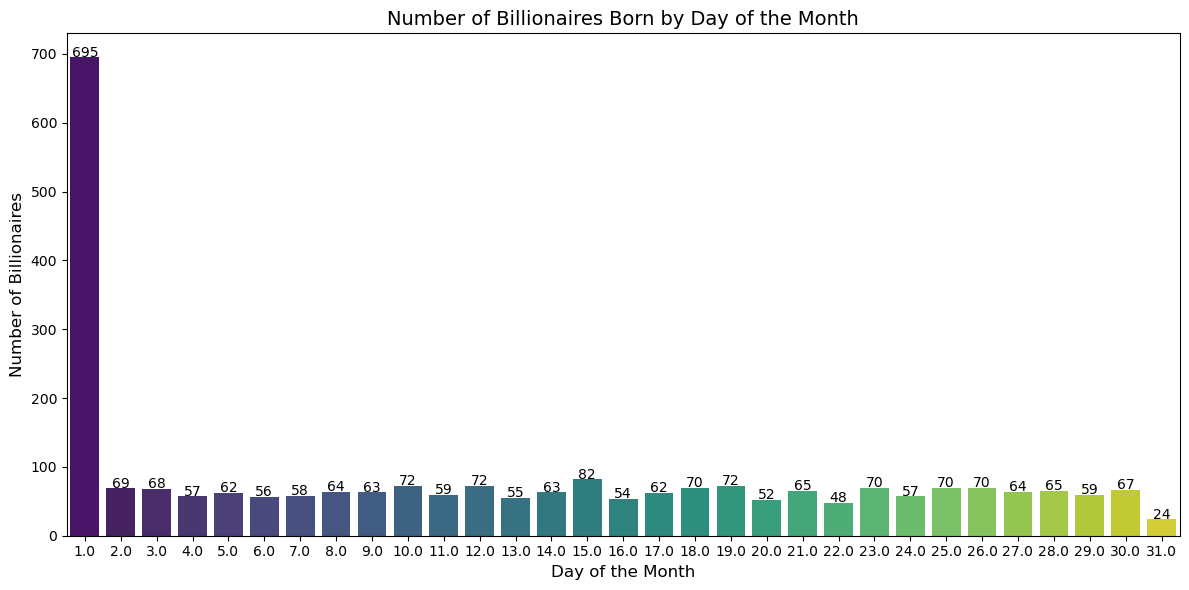

In [94]:
# Convert the birth_date column to datetime format
cleaned_billionaire_df['birth_date'] = pd.to_datetime(cleaned_billionaire_df['birth_date'])

# Extract the day of the month
cleaned_billionaire_df['day_of_month'] = cleaned_billionaire_df['birth_date'].dt.day

# Count the number of billionaires born on each day of the month
day_of_month_distribution = cleaned_billionaire_df['day_of_month'].value_counts().sort_index()

# Create a bar plot for the distribution of billionaire births by day of the month
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=day_of_month_distribution.index, y=day_of_month_distribution.values, palette='viridis')

# Set the first bar color to #481467 and the rest to Viridis
bars = bar_plot.patches
bars[0].set_facecolor('#481467')  # Set the first bar color

# Add title and labels
plt.title('Number of Billionaires Born by Day of the Month', fontsize=14)
plt.xlabel('Day of the Month', fontsize=12)
plt.ylabel('Number of Billionaires', fontsize=12)

# Show the count on each bar
for index, value in enumerate(day_of_month_distribution.values):
    plt.text(index, value + 1, str(value), ha='center')

# Show the plot
plt.tight_layout()
plt.show()


####  🔍Findings

1. **Birth Date Distribution**:
   - The highest number of billionaires are born on the `1st` of the month, with a total of `695 billionaires`.
   - Conversely, the `31st` day has the least number of billionaires, with only `24 billionaires` born.
   - The distribution for the remaining days of the month varies between `54` and `72 billionaires`.

**Possible Reasons for highest number on the 1st and lowest on the 31st**

- **Higher Births on the 1st**:
  - **Cultural and Societal Factors**: The 1st of the month may have cultural significance in many societies, often associated with new beginnings, making it a popular time for families to welcome new children. The notion of starting fresh with the month can also lead to increased emotional and psychological motivations for families to conceive and give birth around this time.
  - **Planned Births**: Many parents may intentionally plan for their child's birth to occur at the beginning of the month, especially if they desire their child to start school at the beginning of the academic year or have a birthday that aligns with the start of the month.
  - **Medical Scheduling**: Hospitals might have scheduling patterns that favor elective births (like induced labor or C-sections) at the beginning of the month, particularly for financial reasons, such as meeting insurance or payment cycles.
  
- **Lower Births on the 31st**:
  - **Fewer Days in the Month**: The 31st day occurs less frequently in the year than other days, as not every month has 31 days. This naturally results in fewer birthdays on this date.
  - **Statistical Anomaly**: The 31st may also be subject to statistical anomalies, where it could be a day less favored for scheduling births, leading to a lower count compared to other days.

### 5.15 What regions have the highest concentration of young billionaires❓

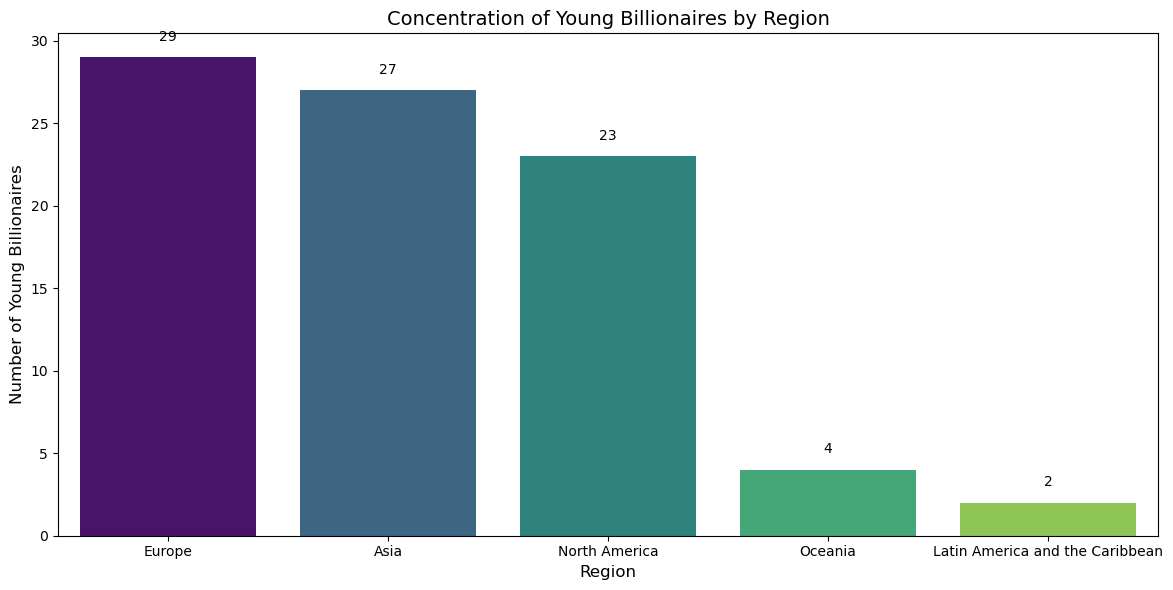

In [95]:
# Filter for young billionaires (age <= 40)
young_billionaires_df = cleaned_billionaire_df[cleaned_billionaire_df['age'] <= 40]

# Count the number of young billionaires by region
young_billionaires_by_region = young_billionaires_df['region'].value_counts()

# Create a bar plot for young billionaires by region
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=young_billionaires_by_region.index, y=young_billionaires_by_region.values, palette='viridis')

# Set the first bar color to #481467 and the rest to Viridis
bars = bar_plot.patches
bars[0].set_facecolor('#481467')  # Set the first bar color

# Add title and labels
plt.title('Concentration of Young Billionaires by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Young Billionaires', fontsize=12)

# Show the count on each bar
for index, value in enumerate(young_billionaires_by_region.values):
    plt.text(index, value + 1, str(value), ha='center')

# Show the plot
plt.tight_layout()
plt.show()


####  🔍Findings
- **Leading Regions**: Europe leads with `29 young billionaires`, followed closely by Asia with `27`. North America also has a notable presence, with `23 young billionaires`.
- **Emerging Markets**: Oceania and Latin America & the Caribbean show a smaller number, with `4 and 2 young billionaires` respectively, indicating potential growth areas for young wealth creators in these regions.
- **Absence in Africa**: Notably, there are `no young billionaires` in Africa, suggesting a significant gap in youth wealth accumulation compared to other regions.
- **Implications**: These trends may reflect differences in economic opportunities, educational access, and entrepreneurial ecosystems across regions, providing insights for policymakers and investors looking to support young wealth creators.


### 5.16 Is there a correlation between a country’s economic indicator, Consumer Price Index (CPI) and the number of billionaires it has❓

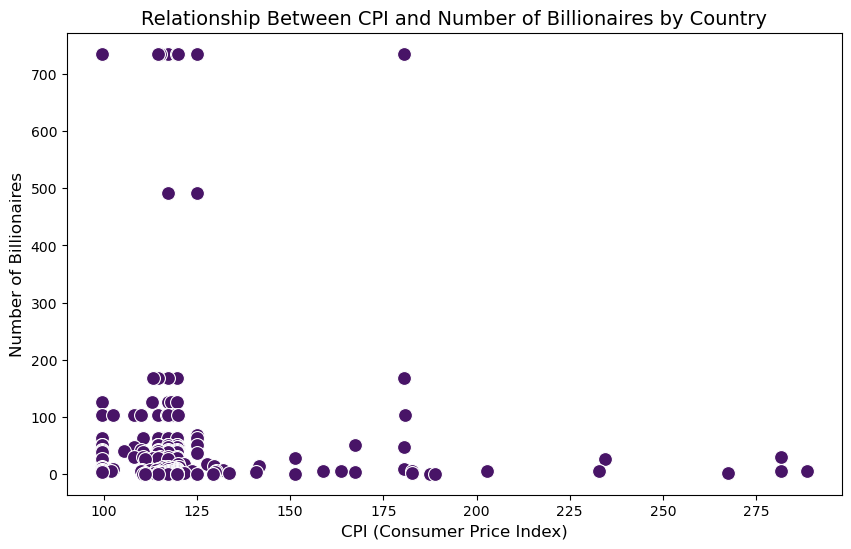

Correlation coefficient: -0.05
P-value: 0.48231


In [100]:
# Aggregate the number of billionaires by country
billionaires_by_country = cleaned_billionaire_df['country_of_citizenship'].value_counts().reset_index()
billionaires_by_country.columns = ['country', 'billionaire_count']

# Merge the CPI data (assuming 'cpi_country' is part of cleaned_billionaire_df)
country_cpi_data = cleaned_billionaire_df[['country_of_citizenship', 'cpi_country']].drop_duplicates()
country_cpi_data.columns = ['country', 'cpi_country']

# Merge both datasets on country
merged_data = pd.merge(billionaires_by_country, country_cpi_data, on='country')

# Drop rows where CPI or billionaire_count contains NaN or infinite values
merged_data = merged_data.replace([np.inf, -np.inf], np.nan).dropna(subset=['cpi_country', 'billionaire_count'])

# Plot a scatter plot to visualize the relationship between CPI and number of billionaires
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cpi_country', y='billionaire_count', data=merged_data, color='#481467', s=100)

# Add labels and title
plt.title('Relationship Between CPI and Number of Billionaires by Country', fontsize=14)
plt.xlabel('CPI (Consumer Price Index)', fontsize=12)
plt.ylabel('Number of Billionaires', fontsize=12)

# Show the plot
plt.show()

# Calculate the correlation between CPI and billionaire count
correlation, p_value = pearsonr(merged_data['cpi_country'], merged_data['billionaire_count'])

# Print the correlation coefficient and p-value
print(f"Correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.5f}")


#### 🔍Findings
- **Weak Negative Correlation**: The correlation coefficient of `-0.05` indicates a very weak negative relationship between CPI and the number of billionaires, suggesting that changes in CPI do not strongly predict the number of billionaires in a country.
- **P-Value Insights**: The p-value of `0.48231` indicates that the observed correlation is not statistically significant, implying that there is no meaningful relationship between CPI and billionaire count in this dataset.
- **Implications**: These findings suggest that factors other than CPI may play a more significant role in the accumulation of wealth and the presence of billionaires in a country, such as economic policies, investment climate, or social conditions.


### 5.17 Is there a correlation between a country’s economic indicator, Gross Domestic Product (GDP) and the number of billionaires it has❓

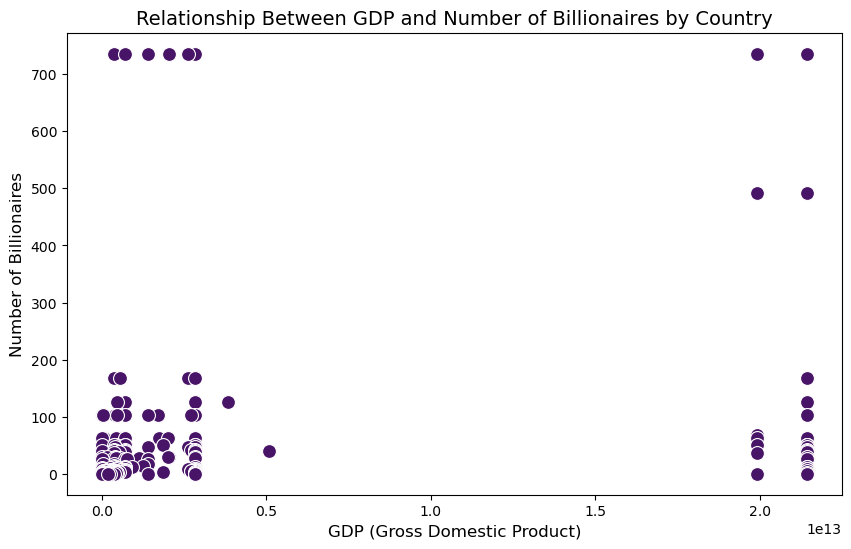

Correlation coefficient: 0.15
P-value: 0.03962


In [99]:
# Aggregate the number of billionaires by country
billionaires_by_country = cleaned_billionaire_df['country_of_citizenship'].value_counts().reset_index()
billionaires_by_country.columns = ['country', 'billionaire_count']

# Merge the GDP data (assuming 'gdp_country' is part of cleaned_billionaire_df)
country_gdp_data = cleaned_billionaire_df[['country_of_citizenship', 'gdp_country']].drop_duplicates()
country_gdp_data.columns = ['country', 'gdp_country']

# Merge both datasets on country
merged_data = pd.merge(billionaires_by_country, country_gdp_data, on='country')

# Drop rows where GDP or billionaire_count contains NaN or infinite values
merged_data = merged_data.replace([np.inf, -np.inf], np.nan).dropna(subset=['gdp_country', 'billionaire_count'])

# Plot a scatter plot to visualize the relationship between GDP and number of billionaires
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_country', y='billionaire_count', data=merged_data, color='#481467', s=100)

# Add labels and title
plt.title('Relationship Between GDP and Number of Billionaires by Country', fontsize=14)
plt.xlabel('GDP (Gross Domestic Product)', fontsize=12)
plt.ylabel('Number of Billionaires', fontsize=12)

# Show the plot
plt.show()

# Calculate the correlation between GDP and billionaire count
correlation, p_value = pearsonr(merged_data['gdp_country'], merged_data['billionaire_count'])

# Print the correlation coefficient and p-value
print(f"Correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.5f}")


####  🔍Findings
- **Positive Correlation**: The correlation coefficient of `0.15` indicates a weak positive relationship between GDP and the number of billionaires. This suggests that, as GDP increases, the number of billionaires tends to rise, albeit the relationship is not strong.
- **Statistical Significance**: The p-value of `0.03962` indicates that the correlation is statistically significant at the 5% level, implying that there is a meaningful association between GDP and the billionaire count.
- **Economic Implications**: These findings suggest that countries with larger economies (higher GDP) are likely to have more billionaires, highlighting the influence of economic prosperity on wealth accumulation. However, the weak correlation indicates that GDP alone is not a definitive predictor of billionaire presence, and other factors may also be at play.


<a id="six"></a>
## **6. ✅ Summary**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

This comprehensive analysis has revealed key insights into the billionaire population. Gender disparities, wealth origin (self-made vs. inherited), and regional concentrations highlight significant patterns. The correlation between economic indicators, such as GDP and CPI, and the number of billionaires sheds light on the broader macroeconomic factors influencing wealth concentration. Additionally, the birth trends of billionaires, both in terms of birth months and days of the week, offer an interesting perspective. With these insights, we gain a clearer understanding of the factors shaping the world's wealthiest individuals.